In [1]:
import numpy as np
import pandas as pd

def get_data(*filepaths):
    df_list = []
    for filepath in filepaths:
        df = pd.read_csv(filepath)
        df_list.append(df)
    return df_list

files = [
    'fuelx_conv_cnt_20160801-20180201.csv','site_wide_conv_cnt_20160801-20180201.csv',
    'fuelx_pgv_cnt_20160801-20180201.csv','site_wide_pgv_cnt_20160801-20180201.csv',
    'fuelx_statistics_20160801-20180201.csv','iotarget_for_clt_20160801-20180201.csv',
    'roi_cpa_clt.csv','new_user_rate_20160801-20180201.csv'
]

df = get_data(*files)
print(len(df))

8


In [2]:
df1, df2, df3, df4, df5, df6, df7, df8 = df[0], df[1], df[2], df[3], df[4], df[5], df[6], df[7]

df = pd.merge(df1, df2, how='outer', on=['bid','year','month'])
df = pd.merge(df, df3, how='outer', on=['bid','year','month'])
df = pd.merge(df, df4, how='outer', on=['bid','year','month'])
df = pd.merge(df, df5, how='outer', on=['bid','year','month'])
df = pd.merge(df, df6, how='outer', on=['bid','year','month'])
df = pd.merge(df, df7, how='left', on='bid')
df = pd.merge(df, df8, how='outer', on=['bid','year','month'])



print(df.shape)
df.head()

(3147, 14)


,bid,year,month,fuelx_conv_cnt,sw_conv_cnt,fuelx_pgv_cnt,sw_pgv_cnt,total_conv,total_clk,total_imp,avg_io_target_for_clt,max_io_target_for_clt,roi_cpa,new_user_rate
0,1677,2016,8,1906.0,180184.0,1532.0,9427174.0,2797.0,2519.0,219259.0,1840.00,1840.0,20.0,1.00
1,1557,2016,8,1812.0,12096.0,27159.0,4245142.0,1126.0,412554.0,4272450.0,91143.33,106615.0,90.0,0.52
2,1360,2016,8,557.0,14172.0,10630.0,3668247.0,869.0,19294.0,650942.0,9977.75,11200.0,3.0,0.54
3,1604,2016,8,520.0,14342.0,3034.0,10215924.0,598.0,31939.0,2376777.0,23046.32,25625.0,2.0,0.65
4,1704,2016,8,438.0,23059.0,16444.0,2256376.0,1162.0,332791.0,7088008.0,108549.86,173835.0,29.0,0.57


In [3]:
df['total_ctr_%'] = 100 * df['total_clk'] / df['total_imp']
df['total_cr_%'] = 100 * df['total_conv'] / df['total_clk']
df['fuelx_sw_cr%'] = 100 * df['fuelx_conv_cnt'] / df['sw_conv_cnt']
df['fuelx_sw_pgvr%'] = 100 * df['fuelx_pgv_cnt'] / df['sw_pgv_cnt']
df.head()

,bid,year,month,fuelx_conv_cnt,sw_conv_cnt,fuelx_pgv_cnt,sw_pgv_cnt,total_conv,total_clk,total_imp,avg_io_target_for_clt,max_io_target_for_clt,roi_cpa,new_user_rate,total_ctr_%,total_cr_%,fuelx_sw_cr%,fuelx_sw_pgvr%
0,1677,2016,8,1906.0,180184.0,1532.0,9427174.0,2797.0,2519.0,219259.0,1840.00,1840.0,20.0,1.00,1.148870,111.036125,1.057808,0.016251
1,1557,2016,8,1812.0,12096.0,27159.0,4245142.0,1126.0,412554.0,4272450.0,91143.33,106615.0,90.0,0.52,9.656146,0.272934,14.980159,0.639767
2,1360,2016,8,557.0,14172.0,10630.0,3668247.0,869.0,19294.0,650942.0,9977.75,11200.0,3.0,0.54,2.964012,4.503991,3.930285,0.289784
3,1604,2016,8,520.0,14342.0,3034.0,10215924.0,598.0,31939.0,2376777.0,23046.32,25625.0,2.0,0.65,1.343795,1.872319,3.625715,0.029699
4,1704,2016,8,438.0,23059.0,16444.0,2256376.0,1162.0,332791.0,7088008.0,108549.86,173835.0,29.0,0.57,4.695127,0.349168,1.899475,0.728779


In [4]:
df_mdf = df[(df.total_imp > df.total_clk) & (df.total_clk > df.total_conv)]
print(df_mdf.shape)
df_mdf.head()

(1176, 18)


,bid,year,month,fuelx_conv_cnt,sw_conv_cnt,fuelx_pgv_cnt,sw_pgv_cnt,total_conv,total_clk,total_imp,avg_io_target_for_clt,max_io_target_for_clt,roi_cpa,new_user_rate,total_ctr_%,total_cr_%,fuelx_sw_cr%,fuelx_sw_pgvr%
1,1557,2016,8,1812.0,12096.0,27159.0,4245142.0,1126.0,412554.0,4272450.0,91143.33,106615.0,90.0,0.52,9.656146,0.272934,14.980159,0.639767
2,1360,2016,8,557.0,14172.0,10630.0,3668247.0,869.0,19294.0,650942.0,9977.75,11200.0,3.0,0.54,2.964012,4.503991,3.930285,0.289784
3,1604,2016,8,520.0,14342.0,3034.0,10215924.0,598.0,31939.0,2376777.0,23046.32,25625.0,2.0,0.65,1.343795,1.872319,3.625715,0.029699
4,1704,2016,8,438.0,23059.0,16444.0,2256376.0,1162.0,332791.0,7088008.0,108549.86,173835.0,29.0,0.57,4.695127,0.349168,1.899475,0.728779
5,1649,2016,8,178.0,27827.0,1033.0,310570.0,3548.0,11207.0,664644.0,7500.00,7725.0,20.0,0.53,1.686166,31.658785,0.639667,0.332614


In [5]:
df_mdf.bid.values[:30]

array([1557, 1360, 1604, 1704, 1649, 1617, 1581, 1691, 1347, 1641, 1251,
       1587, 1634, 1701, 1600, 1697, 1693, 1317, 1538, 1690, 1678, 1630,
         21, 1721, 1557, 1360, 1604, 1677, 1704, 1726])

In [6]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os
import collections
import itertools
import tensorflow as tf

from six.moves import urllib

print(np.__version__)
print(pd.__version__)
print(tf.__version__)

1.14.1
0.22.0
1.6.0


In [7]:
df_mdf['is_roi'] = df_mdf['roi_cpa'].apply(lambda x: 1 if x < 10 else 0)

df_mdf = df_mdf[['bid', 'year', 'month', 'fuelx_conv_cnt', 'sw_conv_cnt', 'fuelx_sw_cr%',
       'fuelx_pgv_cnt', 'sw_pgv_cnt', 'fuelx_sw_pgvr%','new_user_rate', 'total_conv', 'total_clk', 'total_imp',
       'total_ctr_%', 'total_cr_%', 'avg_io_target_for_clt', 'roi_cpa','is_roi']]

df_mdf= df_mdf.rename({'total_ctr_%':'total_ctr','total_cr_%':'total_cr',
                        'fuelx_sw_cr%':'fuelx_sw_cr','fuelx_sw_pgvr%':'fuelx_sw_pgvr'}, axis=1)
df_mdf = df_mdf[['bid','year', 'month', 'fuelx_conv_cnt', 'sw_conv_cnt', 'fuelx_sw_cr',
                   'sw_pgv_cnt', 'new_user_rate','total_conv',
                   'total_clk', 'total_imp', 'total_ctr', 'total_cr',
                   'roi_cpa', 'is_roi', 'avg_io_target_for_clt']]

df_mdf.to_csv('transformed_dataset.csv', index=False)
df = df_mdf[['year', 'month', 'fuelx_conv_cnt', 'sw_conv_cnt', 'fuelx_sw_cr',
       'sw_pgv_cnt', 'new_user_rate','total_conv',
       'total_clk', 'total_imp', 'total_ctr', 'total_cr',
       'roi_cpa', 'is_roi', 'avg_io_target_for_clt']]

print(df.shape, df_mdf.shape)

df = df.dropna()
# df.to_csv('transformed_dataset_20160801-20180201.csv', index=False)

print(df.count())

from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, Imputer, MinMaxScaler
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import pickle
import json

def transformer_data(df):
    X = df.iloc[:, :-1].values
    Y = df.iloc[:,-1].values
    labelencoder_X = LabelEncoder()
    CATEGORICAL_COLS = [idx for idx, column in enumerate(df.columns) if df[column].dtype == np.object]
    
    for col in CATEGORICAL_COLS:
        X[:, col] = labelencoder_X.fit_transform(X[:, col])
    onehotencoder = OneHotEncoder(categorical_features = CATEGORICAL_COLS, dtype=np.int32)
    X = onehotencoder.fit_transform(X)
    Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, random_state=101)
    
    sc_X = MinMaxScaler()
    Xtrain = sc_X.fit_transform(Xtrain)
    Xtest = sc_X.transform(Xtest)
#     with open('scaled_obj_py2.pkl', 'wb') as f:
#         pickle.dump(sc_X, f, protocol=2)
        
#     with open('scaled_obj.pkl', 'wb') as f:
#         pickle.dump(sc_X, f)
#     with open('scaled_obj.json', 'wb') as f:
#         json.dump(sc_X, f)

    return X, Y, Xtrain, Xtest, Ytrain, Ytest

if __name__ == '__main__':

    X, Y, Xtrain, Xtest, Ytrain, Ytest = transformer_data(df)
    print(Xtest.shape)
    print(Xtest[3,:])

    from sklearn.ensemble import RandomForestRegressor

    rf = RandomForestRegressor()
    rf.fit(Xtrain, Ytrain)
    rf_predict = rf.predict(Xtest)

/opt/conda/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


(1176, 15) (1176, 16)
year                     1012
month                    1012
fuelx_conv_cnt           1012
sw_conv_cnt              1012
fuelx_sw_cr              1012
sw_pgv_cnt               1012
new_user_rate            1012
total_conv               1012
total_clk                1012
total_imp                1012
total_ctr                1012
total_cr                 1012
roi_cpa                  1012
is_roi                   1012
avg_io_target_for_clt    1012
dtype: int64
(203, 14)
[1.00000000e+00 0.00000000e+00 0.00000000e+00 1.81296987e-03
 4.28399377e-04 3.06937773e-03 8.60000000e-01 1.12879558e-04
 5.94923181e-04 3.05673559e-03 1.52481430e-02 3.76890084e-03
 5.92473979e-02 0.00000000e+00]


In [8]:
df.columns
df_feat_importance = pd.DataFrame(data = np.array([rf.feature_importances_]), 
                                  columns=['year', 'month', 'fuelx_conv_cnt', 'sw_conv_cnt', 
                                           'fuelx_sw_cr','sw_pgv_cnt', 'new_user_rate', 'total_conv', 
                                           'total_clk', 'total_imp','total_ctr', 'total_cr', 'roi_cpa','is_roi'])

df_feat_importance.T.sort_values(by=0,ascending=False)

,0
total_imp,0.736589
total_ctr,0.060836
total_clk,0.041719
sw_pgv_cnt,0.033307
roi_cpa,0.025149
total_conv,0.023351
fuelx_sw_cr,0.019889
month,0.013988
fuelx_conv_cnt,0.013967
total_cr,0.012094


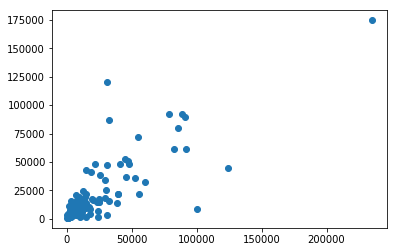

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(Ytest, rf_predict)

/opt/conda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


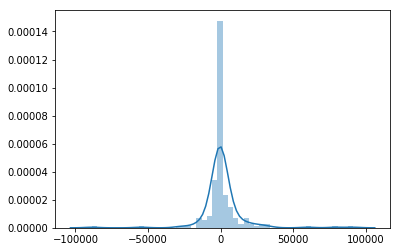

In [10]:
sns.distplot((Ytest-rf_predict))

In [11]:
from sklearn import metrics
print("mae:",metrics.mean_absolute_error(Ytest,rf_predict))
print("mse:",metrics.mean_squared_error(Ytest, rf_predict))
print("rmse:",np.sqrt(metrics.mean_squared_error(Ytest, rf_predict)))

compare_df_all = pd.DataFrame(data = np.array([Ytest,rf_predict]).T, columns=['actual-io','predicted-io'])
compare_df_all

mae: 6209.133896551723
mse: 205471935.84024298
rmse: 14334.292303432458


,actual-io,predicted-io
0,25127.08,17278.450
1,5774.48,4949.290
2,2000.00,2664.758
3,562.52,3628.722
4,3700.44,4476.530
5,10724.43,12131.332
6,10605.72,11364.620
7,4908.22,3349.707
8,2415.00,2448.857
9,4847.82,4322.122


In [12]:
def generate_features(bid, year, month, data):
    """
    :type bid: int
    :type year: int
    :type month: int
    :type data: pandas dataframe
    :rtype: list[floats]
    """
    feature_set = data[(data.year <= year) & (data.month <= month) & (data.bid == bid)]
    feature_set = feature_set.sort_values(by=['year', 'month'])
    feature_set = feature_set.tail(5)
    fuelx_conv_cnt = feature_set['fuelx_conv_cnt'].mean()

    sw_conv_cnt = feature_set['sw_conv_cnt'].mean()
    fuelx_sw_cr = feature_set['fuelx_sw_cr'].mean()
    sw_pgv_cnt = feature_set['sw_pgv_cnt'].mean()
    new_user_rate = feature_set['new_user_rate'].mean()
    total_conv = feature_set['total_conv'].mean()
    total_clk = feature_set['total_clk'].mean()
    total_imp = feature_set['total_imp'].mean()
    total_ctr = feature_set['total_ctr'].mean()
    total_cr = feature_set['total_cr'].mean()
    roi_cpa = feature_set['roi_cpa'].mean()
    is_roi = feature_set['is_roi'].mean()
    feature_list = []
    feature_list.append(year)
    feature_list.append(month)
    feature_list.append(fuelx_conv_cnt)
    feature_list.append(sw_conv_cnt)
    feature_list.append(fuelx_sw_cr)
    feature_list.append(sw_pgv_cnt)
    feature_list.append(new_user_rate)
    feature_list.append(total_conv)
    feature_list.append(total_clk)
    feature_list.append(total_imp)
    feature_list.append(total_ctr)
    feature_list.append(total_cr)
    feature_list.append(roi_cpa)
    feature_list.append(is_roi)
    with open('scaled_obj.pkl', 'rb') as f:
        sc = pickle.load(f)
    feature_list = sc.transform(np.array(feature_list).reshape(1,-1))
    
    return feature_list

In [13]:
import pickle
# with open('budget_calculator_model_py2.pkl', 'wb') as f:
#     pickle.dump(rf, f, protocol=2)
# with open('budget_calculator_model.pkl', 'wb') as f:
#     pickle.dump(rf, f)
with open('budget_calculator_model.pkl', 'rb') as f:
    model = pickle.load(f)

feat = generate_features(1557, 2016, 8, df_mdf)
print(feat)
print(model.predict(feat))

[[0.         0.63636364 0.0576917  0.00975005 0.14978794 0.01486096
  0.52       0.12710238 0.87655769 0.23320841 0.31261429 0.00291111
  0.07125701 0.        ]]
[97749.142]


In [14]:
feat = generate_features(1557, 2017, 12, df_mdf)
print(feat)
print(model.predict(feat))

[[0.5        1.         0.05108471 0.0158545  0.08360366 0.01228559
  0.486      0.13976747 0.05839171 0.32034862 0.01499187 0.04791181
  0.07125701 0.        ]]
[66786.115]


In [15]:
feat = generate_features(1701, 2018, 4, df_mdf)
print(feat)
print(model.predict(feat))

[[1.         0.27272727 0.00526265 0.00178105 0.06936387 0.00427268
  0.49       0.01268766 0.02116992 0.02013672 0.09638737 0.01231994
  0.01120897 0.        ]]
[3814.282]


In [16]:
# !ls -l

In [17]:
# # !pip install --upgrade keras
# import keras
# from keras.wrappers.scikit_learn import KerasRegressor
# from sklearn.model_selection import cross_val_score

# def build_regressor():
#     dnn_regressor = Sequential()
#     dnn_regressor.add(Dense(output_dim=8, init='uniform', input_dim=13, activation='relu'))
#     dnn_regressor.add(Dense(output_dim=8, init='uniform', activation='relu'))
#     dnn_regressor.add(Dense(output_dim=4, init='uniform', activation='relu'))
#     dnn_regressor.add(Dense(output_dim=1, init='uniform', activation='sigmoid'))
#     dnn_regressor.compile(optimizer='adam', loss='mean_squared_error')
    
#     return dnn_regressor

# dnn_regressor = KerasRegressor(build_fn=build_regressor, batch_size=6, epochs=100)
# cross_val_score(estimator=dnn_regressor, X=Xtrain, y=Ytrain, cv=10)

In [18]:
# !ls -l

In [19]:
import numpy as np
import pandas as pd
import pickle
import datetime

def data_read(filename):
    return pd.read_csv(filename)


def generate_features(bid, year, month, roi_cpa, data):
    """
    :type bid: int
    :type year: int
    :type month: int
    :type data: pandas dataframe
    :rtype: list[floats]
    """
    feature_set = data[(data.year <= year) & (data.month <= month) & (data.bid == bid)]
    feature_set = feature_set.sort_values(by=['year', 'month'])
    feature_set = feature_set.tail(5)
    fuelx_conv_cnt = feature_set['fuelx_conv_cnt'].mean()
#     roi_cpa = roi_cpa
    sw_conv_cnt = feature_set['sw_conv_cnt'].mean()
    fuelx_sw_cr = feature_set['fuelx_sw_cr'].mean()
    sw_pgv_cnt = feature_set['sw_pgv_cnt'].mean()
    new_user_rate = feature_set['new_user_rate'].mean()
    total_conv = feature_set['total_conv'].mean()
    total_clk = feature_set['total_clk'].mean()
    total_imp = feature_set['total_imp'].mean()
    total_ctr = feature_set['total_ctr'].mean()
    total_cr = feature_set['total_cr'].mean()
    is_roi = feature_set['is_roi'].mean()
    feature_list = []
    feature_list.append(year)
    feature_list.append(month)
    feature_list.append(fuelx_conv_cnt)
    feature_list.append(sw_conv_cnt)
    feature_list.append(fuelx_sw_cr)
    feature_list.append(sw_pgv_cnt)
    feature_list.append(new_user_rate)
    feature_list.append(total_conv)
    feature_list.append(total_clk)
    feature_list.append(total_imp)
    feature_list.append(total_ctr)
    feature_list.append(total_cr)
    feature_list.append(roi_cpa)
    feature_list.append(is_roi)
    
    with open('scaled_obj.pkl', 'rb') as f:
        sc = pickle.load(f)
    feature_list = sc.transform(np.array(feature_list).reshape(1,-1))
    print(feature_list)
    return feature_list

def model_load(file):
    with open(file, 'rb') as f:
        model = pickle.load(f)
    return model

if __name__ == '__main__':
    file1 = 'transformed_dataset.csv'
    file2 = 'budget_calculator_model.pkl'
    df = data_read(file1)
    date=datetime.datetime.now()
    year = date.year
    month = date.month
    bid = int(input('give a bid here:',))
    roi_cpa = int(input('give a goal here:',))
    
    feat = generate_features(bid, year, month, roi_cpa, df)
    model = model_load(file2)
    io_predict = model.predict(feat)
    print('Here is your IO_target:', io_predict)
    

give a bid here:1557
give a goal here:90
[[1.         0.18181818 0.07365965 0.02374757 0.07784481 0.02282176
  0.5825     0.17456824 0.63384762 0.34320936 0.21373538 0.01754669
  0.07125701 0.        ]]
Here is your IO_target: [97696.142]


In [265]:
if __name__ == '__main__':
    file1 = 'transformed_dataset.csv'
    file2 = 'budget_calculator_model.pkl'
    df = data_read(file1)
    date=datetime.datetime.now()
    year = date.year
    month = date.month
    bid = int(input('give a bid here:',))
    roi_cpa = int(input('give a goal here:',))
    
    feat = generate_features(bid, year, month, roi_cpa, df)
    model = model_load(file2)
    io_predict = model.predict(feat)
    print('Here is your IO_target:', io_predict)

give a bid here:1557
give a goal here:90
[[1.         0.18181818 0.07365965 0.02374757 0.07784481 0.02282176
  0.5825     0.17456824 0.63384762 0.34320936 0.21373538 0.01754669
  0.07125701 0.        ]]
Here is your IO_target: [97696.142]


In [266]:
if __name__ == '__main__':
    file1 = 'transformed_dataset.csv'
    file2 = 'budget_calculator_model.pkl'
    df = data_read(file1)
    date=datetime.datetime.now()
    year = date.year
    month = date.month
    bid = int(input('give a bid here:',))
    roi_cpa = int(input('give a goal here:',))
    
    feat = generate_features(bid, year, month, roi_cpa, df)
    model = model_load(file2)
    io_predict = model.predict(feat)
    print('Here is your IO_target:', io_predict)

give a bid here:1604
give a goal here:3
[[1.         0.18181818 0.06487528 0.01122647 0.10693106 0.00957156
  0.42       0.21596681 0.16199333 0.23997243 0.06153952 0.02824554
  0.00160128 1.        ]]
Here is your IO_target: [68296.73]


In [36]:
import numpy as np
import pandas as pd
import pickle
import datetime

def data_read(filename):
    return pd.read_csv(filename)


def generate_features(bid, year, month, roi_cpa, data):
    """
    :type bid: List[int]
    :type year: List[int]
    :type month: List[int]
    :type roi_cpa: List[float]
    :type data: pandas dataframe
    :rtype: list[float]
    """
    print(data.shape)
#     print(data.bid.values)
#     for bid in data.bid.values:
#         if len(data[data.bid==bid]) < 5:
#             data = data.drop(index = data[data.bid==bid].index)
#     print(data.shape)

#     data = data.dropna()
    feat_matrix = []
    feat_attr = zip(bid, year, month, roi_cpa)
    for idx, ele in enumerate(feat_attr):
        bid, year, month, roi_cpa = ele[0], ele[1], ele[2], ele[3]
        feature_set = data[(data.year <= year) & (data.month <= month) & (data.bid == bid)]
        feature_set = feature_set.sort_values(by=['year', 'month'])
        feature_set = feature_set.tail(5)
        #####################################################
        feature_set = feature_set.dropna()
        if feature_set.empty == False:
            fuelx_conv_cnt = feature_set['fuelx_conv_cnt'].mean()
            sw_conv_cnt = feature_set['sw_conv_cnt'].mean()
            sw_pgv_cnt = feature_set['sw_pgv_cnt'].mean()
            total_conv = feature_set['total_conv'].mean()
            total_clk = feature_set['total_clk'].mean()
            total_imp = feature_set['total_imp'].mean()
            roi_cpa = feature_set['roi_cpa'].mean()
            is_roi = feature_set['is_roi'].mean()
            if feature_set['total_imp'].sum() != 0:
                total_ctr = 100*feature_set['total_clk'].sum()/feature_set['total_imp'].sum()
            else:
                total_ctr = 0
            if feature_set['total_clk'].sum() != 0:
                total_cr = 100*feature_set['total_conv'].sum()/feature_set['total_imp'].sum()
            else:
                total_cr = 0
            if feature_set['sw_conv_cnt'].sum() != 0:
                fuelx_sw_cr = 100*feature_set['fuelx_conv_cnt'].sum()/feature_set['sw_conv_cnt'].sum()
            else:
                fuelx_sw_cr = 0
            new_user_rate = feature_set['new_user_rate'].mean()
        
        #####################################################
#         fuelx_conv_cnt = feature_set['fuelx_conv_cnt'].mean()
#         sw_conv_cnt = feature_set['sw_conv_cnt'].mean()
#         fuelx_sw_cr = feature_set['fuelx_sw_cr'].mean()
#         sw_pgv_cnt = feature_set['sw_pgv_cnt'].mean()
#         new_user_rate = feature_set['new_user_rate'].mean()
#         total_conv = feature_set['total_conv'].mean()
#         total_clk = feature_set['total_clk'].mean()
#         total_imp = feature_set['total_imp'].mean()
#         total_ctr = feature_set['total_ctr'].mean()
#         total_cr = feature_set['total_cr'].mean()
#         is_roi = feature_set['is_roi'].mean()
        feature_list = []
        feature_list.append(year)
        feature_list.append(month)
        feature_list.append(fuelx_conv_cnt)
        feature_list.append(sw_conv_cnt)
        feature_list.append(fuelx_sw_cr)
        feature_list.append(sw_pgv_cnt)
        feature_list.append(new_user_rate)
        feature_list.append(total_conv)
        feature_list.append(total_clk)
        feature_list.append(total_imp)
        feature_list.append(total_ctr)
        feature_list.append(total_cr)
        feature_list.append(roi_cpa)
        feature_list.append(is_roi)    
        
        with open('scaled_obj.pkl', 'rb') as f:
            sc = pickle.load(f)

        feat_matrix.append(feature_list)
#         print(feat_matrix)
    feat_matrix = sc.transform(feat_matrix)
#     print(feat_matrix)
    return feat_matrix

def model_load(file):
    with open(file, 'rb') as f:
        model = pickle.load(f)
    return model

if __name__ == '__main__':
    file1 = 'transformed_dataset.csv'
    file2 = 'budget_calculator_model.pkl'
    df = data_read(file1)
    date=datetime.datetime.now()
#     bid = [1557]
#     roi_cpa = [90]
#     bid = [1557, 1360, 1604, 1704, 1649, 1617, 1581, 1347, 1641]
#     bid = [1557, 1360, 1604, 1704, 1649, 1617, 1581, 1347, 1641, 1251,
#        1587, 1634, 1701, 1600, 1697, 1693, 1317, 1538, 1690, 1678, 1630,
#          21, 1721, 1557, 1360, 1604, 1677, 1704, 1726]
#     roi_cpa =[50 for i in range(len(bid))]
    bid = list(set(df.bid.values))
    #roi_cpa = [np.random.choice(range(1,101)) for i in range(len(bid))]
    year = [date.year for i in range(len(bid))]
    month = [date.month for i in range(len(bid))]
    
    feat = generate_features(bid, year, month, roi_cpa, df)
#     print(feat)
    model = model_load(file2)
    io_predict = model.predict(feat)
    print('Here is your IO_target:', io_predict)
    print(type(io_predict))
    print(type(bid))
    df_new = pd.DataFrame(data=np.array([bid, roi_cpa, io_predict]).T, columns=['clt_bid','roi_cpa','io_predict'])
    print(df_new.shape)
    print(df_new.head(10))

(1176, 16)
Here is your IO_target: [  3021.262  12212.887   4149.466   4154.308   6996.722   2530.346
   6817.666   5264.142   4859.089  97332.933  92388.737   3863.497
   1922.346   2042.781   1742.004   1783.292  60416.465  58571.602
  77941.282   9908.594   1047.652   1397.714   7195.093   6138.535
   6233.525 166061.872 151187.759   1703.924   2081.751   2469.717
   2712.526   1677.19    1826.806   4419.188  18576.109  21792.388
  18594.364  18576.109  21792.388  18594.364   8730.377   8730.377
   8730.377   7494.384   3078.94    3078.94    9336.136   9161.08
   9161.08    1972.788   2184.061   2568.327  12262.266   4233.272
  81699.862   2708.568   2708.568   7918.129   2549.266   5622.423
  51790.404  56153.039   6092.315   2120.112   5066.985   5952.028
   1348.61    1325.32    1402.082   8816.559   3412.896   3441.907
   6952.225   2018.314   1280.949   9399.774  11545.878  83123.757
  89208.777  99163.124  89208.777  83123.757   3348.265   3348.281
   4826.645   4105.167   399

In [21]:
dataframe = pd.read_csv('transformed_dataset.csv')
# dataframe.columns

df_new = dataframe.dropna()
# df_new.bid.value_counts(dropna=False)
df_new[df_new.bid==1691]

,bid,year,month,fuelx_conv_cnt,sw_conv_cnt,fuelx_sw_cr,sw_pgv_cnt,new_user_rate,total_conv,total_clk,total_imp,total_ctr,total_cr,roi_cpa,is_roi,avg_io_target_for_clt
7,1691,2016,8,61.0,1536.0,3.971354,1253025.0,0.62,149.0,5959.0,406593.0,1.465593,2.50042,3.0,1,4782.7


In [22]:
# len(df_new[df_new.bid == 1691]) == 1

# def new_fun(bids, df):
#     for bid in bids:
#         if len(df[df.bid==bid]) == 1:
# #             df = df.drop(df[df.bid==bid])
#             df = df.drop(index = df[df.bid==1691].index)
#     return df

# bids = [1774, 1557, 1604, 1691]
# new_fun(bids, df_new)

In [23]:
!ls -l

total 899940
drwxr-xr-x   2 root root        4096 Mar  7 06:28 bin
drwxr-xr-x   3 root root        4096 Mar  7 06:29 boot
-rw-r--r--   1 root root      629017 Mar 14 18:39 budget_calculator_model.pkl
-rw-r--r--   1 root root      836522 Mar 14 20:22 budget_calculator_model_py2.pkl
-rw-r--r--   1 root root       23002 Mar  7 07:36 clktrack_cnt_20160801-20180201.csv
-rw-r--r--   1 root root       27781 Mar  7 07:36 convtrack_cnt_20160801-20180201.csv
drwxr-xr-x   5 root root        4096 Mar  7 06:33 datalab
drwxr-xr-x   3 root root        4096 Mar  7 06:31 datalab-pyspark
drwxr-xr-x  24 root root        4096 Mar  7 06:27 dataproc-initialization-actions
drwxr-xr-x  16 root root        2800 Mar  7 06:26 dev
drwxr-xr-x  91 root root        4096 Mar 14 18:26 etc
drwxr-xr-x   3 root root        4096 Mar  7 06:26 export
-rw-r--r--   1 root root       19070 Mar  7 09:30 fuelx_conv_cnt_20160801-20180201.csv
-rw-r--r--   1 root root       15997 Mar  7 07:39 fuelx_pgv_cnt_20160801-20180201.csv
-rw

In [25]:
!sudo gsutil cp predict.csv gs://shop-like-model/BudgetCalculator/

Copying file://predict.csv [Content-Type=text/csv]...
/ [1 files][  4.5 KiB/  4.5 KiB]                                                
Operation completed over 1 objects/4.5 KiB.                                      


In [182]:
!sudo gsutil cp *.pkl gs://shop-like-model/BudgetCalculator/

Copying file://budget_calculator_model.pkl [Content-Type=application/octet-stream]...
Copying file://budget_calculator_model_py2.pkl [Content-Type=application/octet-stream]...
Copying file://scaled_obj.pkl [Content-Type=application/octet-stream]...        
Copying file://scaled_obj_py2.pkl [Content-Type=application/octet-stream]...    
\ [4 files][  1.4 MiB/  1.4 MiB]                                                
Operation completed over 4 objects/1.4 MiB.                                      


In [35]:
# from flask import Flask, jsonify, make_response, request
import numpy as np
import pandas as pd
import pickle
import datetime
import requests
import math

def data_read(filename):
    return pd.read_csv(filename)

def generate_features(bid,year,month,data):
    """
    :type bid: List[int]
    :type year: List[int]
    :type month: List[int]
    :type roi_cpa: List[float]
    :type data: pandas dataframe
    :rtype: list[float]
    """
    feature_dict = {}
    feat_matrix = []
    feat_attr = zip(bid,year,month)
    for idx, ele in enumerate(feat_attr):
        bid, year, month = ele[0],ele[1], ele[2]
        feature_set = data[(data.year <= year) & (data.month <= month) & (data.bid == bid)]
        feature_set = feature_set.sort_values(by=['year', 'month'])
        feature_set = feature_set.tail(5)
        feature_set = feature_set.dropna()
        if feature_set.empty == False:
            fuelx_conv_cnt = feature_set['fuelx_conv_cnt'].mean()
            sw_conv_cnt = feature_set['sw_conv_cnt'].mean()
            sw_pgv_cnt = feature_set['sw_pgv_cnt'].mean()
            total_conv = feature_set['total_conv'].mean()
            total_clk = feature_set['total_clk'].mean()
            total_imp = feature_set['total_imp'].mean()
            roi_cpa = feature_set['roi_cpa'].mean()
            is_roi = feature_set['is_roi'].mean()
            if feature_set['total_imp'].sum() != 0:
                total_ctr = 100*feature_set['total_clk'].sum()/feature_set['total_imp'].sum()
            else:
                total_ctr = 0
            if feature_set['total_clk'].sum() != 0:
                total_cr = 100*feature_set['total_conv'].sum()/feature_set['total_imp'].sum()
            else:
                total_cr = 0
            if feature_set['sw_conv_cnt'].sum() != 0:
                fuelx_sw_cr = 100*feature_set['fuelx_conv_cnt'].sum()/feature_set['sw_conv_cnt'].sum()
            else:
                fuelx_sw_cr = 0
            new_user_rate = feature_set['new_user_rate'].mean()

        feature_list = []
        feature_list.append(year)
        feature_list.append(month)
        feature_list.append(fuelx_conv_cnt)
        feature_list.append(sw_conv_cnt)
        feature_list.append(fuelx_sw_cr)
        feature_list.append(sw_pgv_cnt)
        feature_list.append(new_user_rate)
        feature_list.append(total_conv)
        feature_list.append(total_clk)
        feature_list.append(total_imp)
        feature_list.append(total_ctr)
        feature_list.append(total_cr)
        feature_list.append(roi_cpa)
        feature_list.append(is_roi)

        with open('scaled_obj.pkl', 'rb') as f:
            sc = pickle.load(f)
        feat_matrix.append(feature_list)
    feat_matrix = sc.transform(np.array(feat_matrix).reshape(1,-1))
        with open('budget_calculator_model.pkl', 'rb') as f:
            model = pickle.load(f)
        io_predict = model.predict(feat_matrix)
        feature_dict[bid] = io_predict
    res = pd.DataFrame(feature_dict.items(), columns=['BID', 'IO_Predicted'])
    return res

def model_load(file):
    with open(file, 'rb') as f:
        model = pickle.load(f)
    return model

if __name__ == '__main__':
    file1 = 'transformed_dataset.csv'
    file2 = 'budget_calculator_model.pkl'
    df = data_read(file1)
    date=datetime.datetime.now()
    bidlist = df['bid'].unique()
    year = [date.year for i in range(len(bidlist))]
    
    month = [date.month for i in range(len(bidlist))]

    res = generate_features(bidlist,year, month, df)
    print(feat)
    #model = model_load(file2)
    #io_predict = model.predict(feat)
    #df_new = pd.DataFrame(data=np.array([bid,io_predict]).T, columns=['clt_bid','io_predict'])
    #print(df_new.shape)
    #df_new.to_csv('predict.csv')
#     df_new = pd.DataFrame(data = io_predict)
    res.to_csv('predict.csv')
    print(res.head())
    print('Here is your IO_target:', io_predict)
    print(len(io_predict))
    print(bidlist)
    print(len(bidlist))

IndentationError: unexpected indent (<ipython-input-35-002690ad47ab>, line 73)

In [281]:
bid = list(set(df.bid.values))

In [283]:
len(bid)

219

In [294]:
np.random.choice(list(range(1,101)))

10

,clt_bid,io_predict
0,1538.0,97332.933
1,2050.0,6783.636
2,2052.0,60416.465
3,2051.0,18576.109
4,2054.0,6138.535
5,2060.0,9908.594
6,2064.0,1922.346
7,2066.0,1922.346
8,2067.0,3917.657
9,1557.0,7195.093


In [37]:
import numpy as np
import pandas as pd
import pickle
import datetime

def data_read(filename):
    return pd.read_csv(filename)


def generate_features(bid, year, month, data):
    """
    :type bid: List[int]
    :type year: List[int]
    :type month: List[int]
    :type roi_cpa: List[float]
    :type data: pandas dataframe
    :rtype: list[float]
    """
    print(data.shape)
#     print(data.bid.values)
#     for bid in data.bid.values:
#         if len(data[data.bid==bid]) < 5:
#             data = data.drop(index = data[data.bid==bid].index)
#     print(data.shape)

#     data = data.dropna()
    feat_matrix = []
    feat_attr = zip(bid, year, month)
    for idx, ele in enumerate(feat_attr):
        bid, year, month = ele[0], ele[1], ele[2]
        feature_set = data[(data.year <= year) & (data.month <= month) & (data.bid == bid)]
        feature_set = feature_set.sort_values(by=['year', 'month'])
        feature_set = feature_set.tail(5)
        #####################################################
        feature_set = feature_set.dropna()
        if feature_set.empty == False:
            fuelx_conv_cnt = feature_set['fuelx_conv_cnt'].mean()
            sw_conv_cnt = feature_set['sw_conv_cnt'].mean()
            sw_pgv_cnt = feature_set['sw_pgv_cnt'].mean()
            total_conv = feature_set['total_conv'].mean()
            total_clk = feature_set['total_clk'].mean()
            total_imp = feature_set['total_imp'].mean()
            roi_cpa = feature_set['roi_cpa'].mean()
            is_roi = feature_set['is_roi'].mean()
            if feature_set['total_imp'].sum() != 0:
                total_ctr = 100*feature_set['total_clk'].sum()/feature_set['total_imp'].sum()
            else:
                total_ctr = 0
            if feature_set['total_clk'].sum() != 0:
                total_cr = 100*feature_set['total_conv'].sum()/feature_set['total_imp'].sum()
            else:
                total_cr = 0
            if feature_set['sw_conv_cnt'].sum() != 0:
                fuelx_sw_cr = 100*feature_set['fuelx_conv_cnt'].sum()/feature_set['sw_conv_cnt'].sum()
            else:
                fuelx_sw_cr = 0
            new_user_rate = feature_set['new_user_rate'].mean()
        
        #####################################################
#         fuelx_conv_cnt = feature_set['fuelx_conv_cnt'].mean()
#         sw_conv_cnt = feature_set['sw_conv_cnt'].mean()
#         fuelx_sw_cr = feature_set['fuelx_sw_cr'].mean()
#         sw_pgv_cnt = feature_set['sw_pgv_cnt'].mean()
#         new_user_rate = feature_set['new_user_rate'].mean()
#         total_conv = feature_set['total_conv'].mean()
#         total_clk = feature_set['total_clk'].mean()
#         total_imp = feature_set['total_imp'].mean()
#         total_ctr = feature_set['total_ctr'].mean()
#         total_cr = feature_set['total_cr'].mean()
#         is_roi = feature_set['is_roi'].mean()
        feature_list = []
        feature_list.append(year)
        feature_list.append(month)
        feature_list.append(fuelx_conv_cnt)
        feature_list.append(sw_conv_cnt)
        feature_list.append(fuelx_sw_cr)
        feature_list.append(sw_pgv_cnt)
        feature_list.append(new_user_rate)
        feature_list.append(total_conv)
        feature_list.append(total_clk)
        feature_list.append(total_imp)
        feature_list.append(total_ctr)
        feature_list.append(total_cr)
        feature_list.append(roi_cpa)
        feature_list.append(is_roi)    
        
        with open('scaled_obj.pkl', 'rb') as f:
            sc = pickle.load(f)

        feat_matrix.append(feature_list)
#         print(feat_matrix)
    feat_matrix = sc.transform(feat_matrix)
#     print(feat_matrix)
    return feat_matrix

def model_load(file):
    with open(file, 'rb') as f:
        model = pickle.load(f)
    return model

if __name__ == '__main__':
    file1 = 'transformed_dataset.csv'
    file2 = 'budget_calculator_model.pkl'
    df = data_read(file1)
    date=datetime.datetime.now()
#     bid = [1557]
#     roi_cpa = [90]
#     bid = [1557, 1360, 1604, 1704, 1649, 1617, 1581, 1347, 1641]
#     bid = [1557, 1360, 1604, 1704, 1649, 1617, 1581, 1347, 1641, 1251,
#        1587, 1634, 1701, 1600, 1697, 1693, 1317, 1538, 1690, 1678, 1630,
#          21, 1721, 1557, 1360, 1604, 1677, 1704, 1726]
#     roi_cpa =[50 for i in range(len(bid))]
    bid = list(set(df.bid.values))
    #roi_cpa = [np.random.choice(range(1,101)) for i in range(len(bid))]
    year = [date.year for i in range(len(bid))]
    month = [date.month for i in range(len(bid))]
    
    feat = generate_features(bid, year, month, df)
#     print(feat)
    model = model_load(file2)
    io_predict = model.predict(feat)
    print('Here is your IO_target:', io_predict)
    print(type(io_predict))
    print(type(bid))
    df_new = pd.DataFrame(data=np.array([bid, io_predict]).T, columns=['clt_bid','io_predict'])
    print(df_new.shape)
    print(df_new.head(10))

(1176, 16)
Here is your IO_target: [  3021.262  12212.887   4149.466   4149.466   6996.722   2530.346
   6817.666   5264.142   4859.089  97332.933  97332.933   3863.497
   1922.346   1922.346   1742.004   1742.004  60416.465  60416.465
  60416.465   9908.594   1047.652   1397.714   7195.093   6138.535
   6138.535 166061.872 166061.872   1703.924   1703.924   2469.717
   2469.717   1677.19    1677.19    4419.188  18576.109  18576.109
  18576.109  18576.109  18576.109  18576.109   8730.377   8730.377
   8730.377   7494.384   3078.94    3078.94    9336.136   9336.136
   9336.136   1972.788   1972.788   2568.327  12262.266   4233.272
  81699.862   2708.568   2708.568   7918.129   2549.266   5622.423
  51790.404  51790.404   6092.315   2120.112   5066.985   5952.028
   1348.61    1348.61    1402.082   8816.559   3412.896   3412.896
   6952.225   2018.314   1280.949   9399.774  11545.878  83123.757
  83123.757  83123.757  83123.757  83123.757   3348.265   3348.265
   4826.645   4105.167   39